In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import colorcet
import cycler
import pandas as pd
from scipy import signal
from scipy.interpolate import interp1d
import rubin_sim.phot_utils as phot_utils
from rubin_sim.data import get_data_dir

from scipy.interpolate import UnivariateSpline
from scipy.optimize import curve_fit


In [2]:
# set up lsst filters for resampling
lsst = {}
lsst_filterlist = 'ugrizy'
for f in lsst_filterlist:
    lsst[f] = phot_utils.Bandpass()
    lsst[f].read_throughput(os.path.join(get_data_dir(), 'throughputs', 'baseline', f'total_{f}.dat'))


In [3]:
# read in solar spectrum and limit wavelength range
sun = phot_utils.Sed()
sun.read_sed_flambda(os.path.join(get_data_dir(), 'movingObjects', 'kurucz_sun.gz'))

sun_limited = phot_utils.Sed()
idx = np.where((sun.wavelen > 299) & (sun.wavelen < 1105))
sun_limited.set_sed(wavelen=sun.wavelen[idx], flambda=sun.flambda[idx])
sun_limited.resample_sed(wavelen_match=lsst['g'].wavelen)
wavelen_step = np.unique(np.diff(lsst['g'].wavelen)).min()

/Users/yoachim/git_repos/rubin_sim/rubin_sim/phot_utils/sed.py:804: UserWarning: There is an area of non-overlap between desired wavelength range  (300.00 to 1150.00)and sed FromArray (299.89 to 1100.95)
  warnings.warn(


In [7]:
lsst['g'].sb


array([0., 0., 0., ..., 0., 0., 0.])

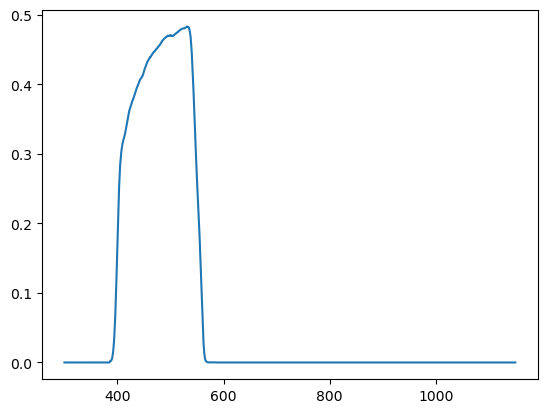

In [8]:
plt.plot(lsst['g'].wavelen, lsst['g'].sb)